In [1]:
from utilyties import explorar_dataframe, analizar_correlacion, analizar_tendencias, visualizar_mapa, graficar_correlacion_dos_df, contar_puntos_en_poligonos, contar_puntos_en_poligonos_detallado, evolucionTemporal, pivot_comunas_indice
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# definimos rutas de archivos ambientales
rutaArbolUrbano = 'Enviromental/arbol_urbano.geojson'
rutaEcoparques = 'Enviromental/ecoparques.geojson'
rutaInvZonasVerdes = 'Enviromental/inventario_zonas_verdes.geojson'
rutaRedHidrica = 'Enviromental/red_hidrica_mr.geojson'
rutaRioMedellin = 'Enviromental/rio_medellin_mr.geojson'
rutaAtraTuristico = 'Enviromental/atractivos_turisticos_mr.geojson'
rutaComunas = 'Enviromental/comunas_y_corregimientos.geojson'
rutaGenerales = 'Enviromental/pot48_2014_usos_generales.geojson'
rutaCorredorVerde = 'Enviromental/pot48_2014_corredores_ver.geojson'

In [3]:
# load data
arbolUrbano = gpd.read_file(rutaArbolUrbano)
ecoparques = gpd.read_file(rutaEcoparques)
invZonasVerdes = gpd.read_file(rutaInvZonasVerdes)
redHidrica = gpd.read_file(rutaRedHidrica)
rioMedellin = gpd.read_file(rutaRioMedellin)
atraTuristico = gpd.read_file(rutaAtraTuristico)
comunas = gpd.read_file(rutaComunas)
generales = gpd.read_file(rutaGenerales)
corredorVerde = gpd.read_file(rutaCorredorVerde)

In [4]:
# Define geographic limits for Medellín
# Adjust these values according to the CRS and the distribution of your data
point_x_min = 829_000.0
point_x_max = 839_000.0
point_y_min = 1_174_000.0
point_y_max = 1_190_900.0

# Apply the filter
filtro = (
    (arbolUrbano['point_x'] > point_x_min) &
    (arbolUrbano['point_x'] < point_x_max) &
    (arbolUrbano['point_y'] > point_y_min) &
    (arbolUrbano['point_y'] < point_y_max)
)

arbolUrbano = arbolUrbano[filtro]

# exportamos el dataframe a geojson
arbolUrbano.to_file('arbol_urbano.geojson', driver='GeoJSON')

In [5]:
# Get the new bounds
minx, miny, maxx, maxy = arbolUrbano.total_bounds

print(f"Min X: {minx}, Min Y: {miny}, Max X: {maxx}, Max Y: {maxy}")


Min X: 4709904.908559153, Min Y: 2240191.138035504, Max X: 4719907.377114352, Max Y: 2257087.593180757


/tmp/ipykernel_30017/371244762.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/home/juan27/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


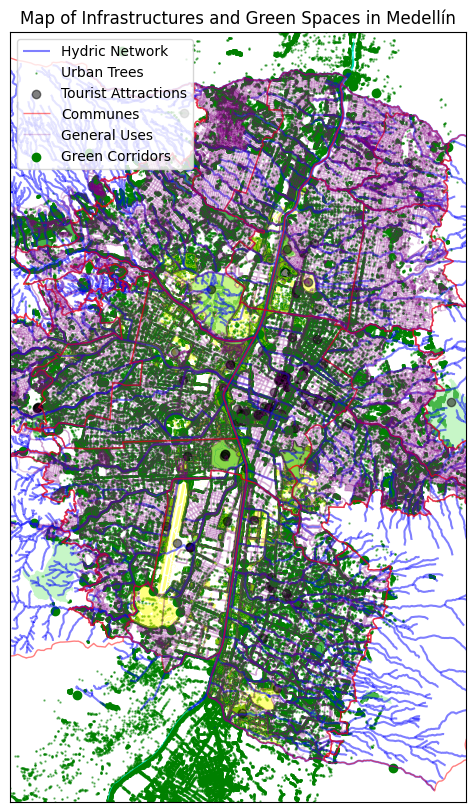

In [6]:
# plot everything
ax = redHidrica.plot(figsize=(10, 10), color='blue', alpha=0.5, markersize=1, label='Hydric Network')
arbolUrbano.plot(ax=ax, color='green', alpha=0.5, markersize=0.5, label='Urban Trees')
invZonasVerdes.plot(ax=ax, color='yellow', alpha=0.5, label='Green Zones')
ecoparques.plot(ax=ax, color='lightgreen', alpha=0.5, label='Eco Parks')
rioMedellin.plot(ax=ax, color='cyan', alpha=0.7, label='Medellin River')
atraTuristico.plot(ax=ax, color='black', alpha=0.5, label='Tourist Attractions')
comunas.boundary.plot(ax=ax, color='red', alpha=0.5, linewidth=1, label='Communes')
generales.boundary.plot(ax=ax, color='purple', alpha=0.2, linewidth=1, label='General Uses')
corredorVerde.boundary.plot(ax=ax, color='green', linewidth=1, label='Green Corridors')
plt.title('Map of Infrastructures and Green Spaces in Medellín')
plt.legend()
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

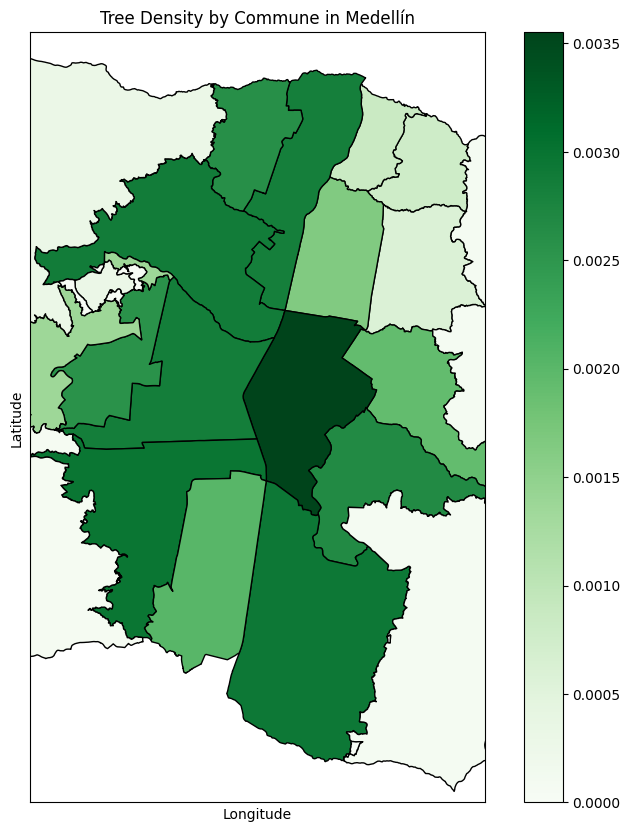

In [7]:
arbolPorComuna = contar_puntos_en_poligonos(arbolUrbano, comunas, 'nombre')

arbolPorComuna['tree_density'] = arbolPorComuna['conteo_puntos'] / arbolPorComuna['Shape_Area']
arbolPorComuna.plot(column='tree_density', legend=True, figsize=(10, 10), cmap='Greens', edgecolor='black')
plt.title('Tree Density by Commune in Medellín')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.xticks([])
plt.yticks([])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

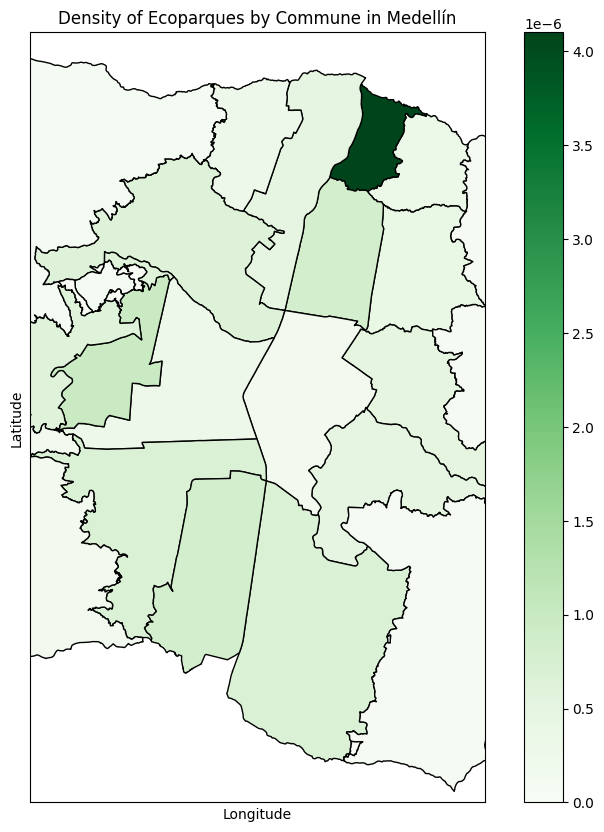

In [8]:
# Convert GeoSeries to GeoDataFrame
ecoparques_centroides = gpd.GeoDataFrame(geometry=ecoparques['geometry'].centroid)

# Count points in polygons
ecoparquesPorComuna = contar_puntos_en_poligonos(ecoparques_centroides, comunas, 'nombre') 

# Calculate the density of ecoparques
ecoparquesPorComuna['ecoparques_density'] = ecoparquesPorComuna['conteo_puntos'] / ecoparquesPorComuna['Shape_Area']

# Plot
ecoparquesPorComuna.plot(column='ecoparques_density', legend=True, figsize=(10, 10), cmap='Greens', edgecolor='black')  
plt.title('Density of Ecoparques by Commune in Medellín')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.xticks([])
plt.yticks([])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

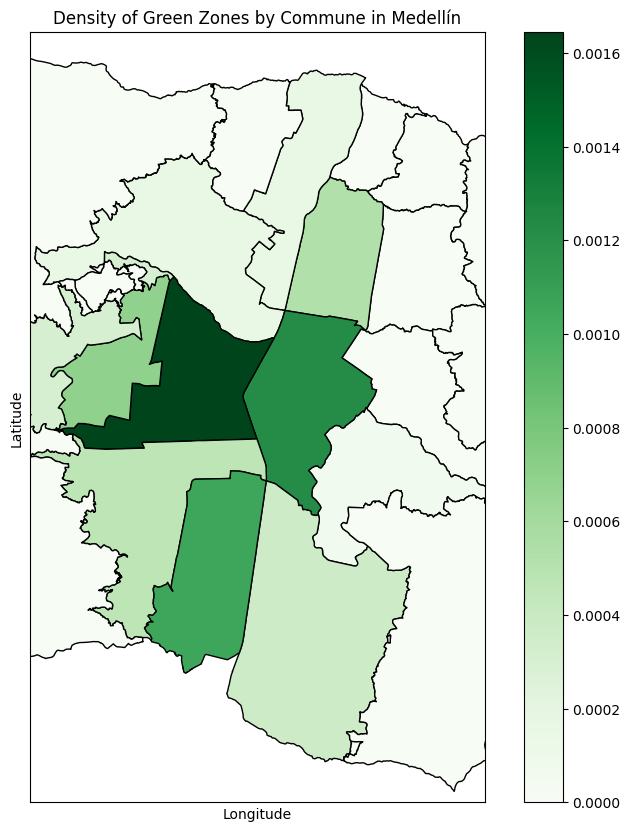

In [9]:
# Count green zones in each commune
invZonasVerdesPorComuna = contar_puntos_en_poligonos(invZonasVerdes, comunas, 'nombre')

# Calculate the density of green zones
invZonasVerdesPorComuna['green_zones_density'] = invZonasVerdesPorComuna['conteo_puntos'] / invZonasVerdesPorComuna['Shape_Area']

# Plot the density of green zones by commune
invZonasVerdesPorComuna.plot(column='green_zones_density', legend=True, figsize=(10, 10), cmap='Greens', edgecolor='black')
plt.title('Density of Green Zones by Commune in Medellín')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.xticks([])
plt.yticks([])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

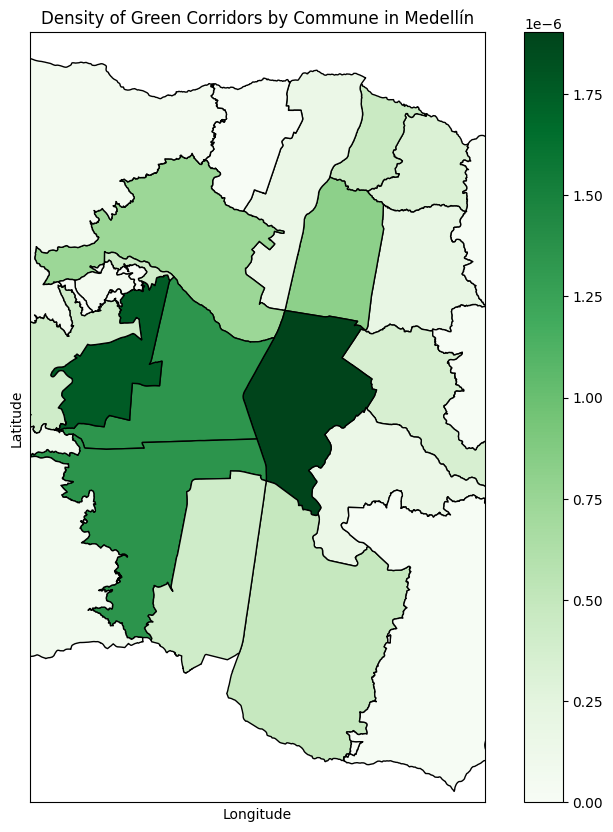

In [10]:
# Convert GeoSeries to GeoDataFrame for green corridors
coVerdecentroides = gpd.GeoDataFrame(geometry=corredorVerde['geometry'].centroid)

# Count points in polygons for green corridors
corredorVerdePorComuna = contar_puntos_en_poligonos(coVerdecentroides, comunas, 'nombre')

# Calculate the density of green corridors
corredorVerdePorComuna['densidad_corredor'] = corredorVerdePorComuna['conteo_puntos'] / corredorVerdePorComuna['Shape_Area']

# Plot the density of green corridors by commune
corredorVerdePorComuna.plot(column='densidad_corredor', legend=True, figsize=(10, 10), cmap='Greens', edgecolor='black')
plt.title('Density of Green Corridors by Commune in Medellín')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.xticks([])
plt.yticks([])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


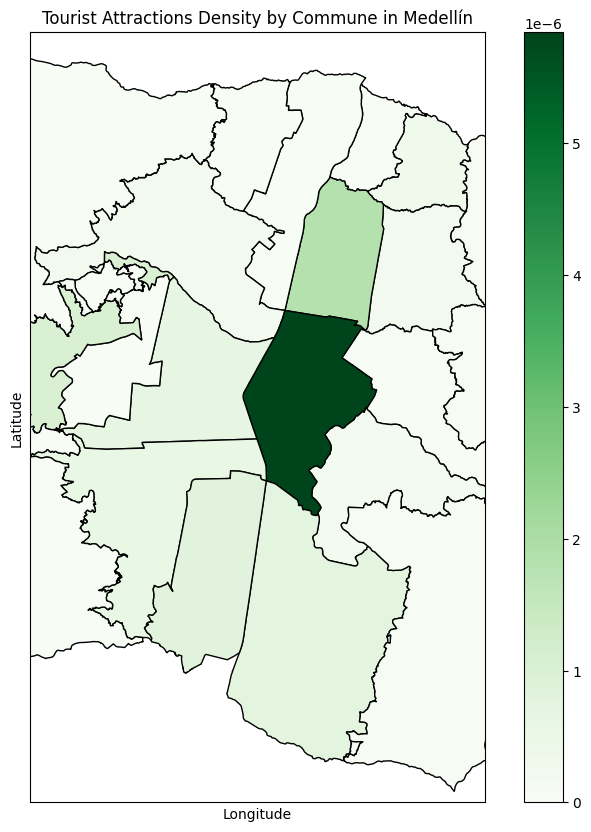

In [11]:
atraTuristicoPorComuna = contar_puntos_en_poligonos(atraTuristico, comunas, 'nombre')
atraTuristicoPorComuna['atra_density'] = atraTuristicoPorComuna['conteo_puntos'] / atraTuristicoPorComuna['Shape_Area']
atraTuristicoPorComuna.plot(column='atra_density', legend=True, figsize=(10, 10), cmap='Greens', edgecolor='black')
plt.title('Tourist Attractions Density by Commune in Medellín')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.xticks([])
plt.yticks([])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [12]:
# Convert GeoSeries to GeoDataFrame for green corridors
redHidricaentroides = gpd.GeoDataFrame(geometry=redHidrica['geometry'].centroid)

redHidricaPorComuna = contar_puntos_en_poligonos(redHidricaentroides, comunas, 'nombre')
redHidricaPorComuna['hidric_density'] = redHidricaPorComuna['conteo_puntos'] / redHidricaPorComuna['Shape_Area']

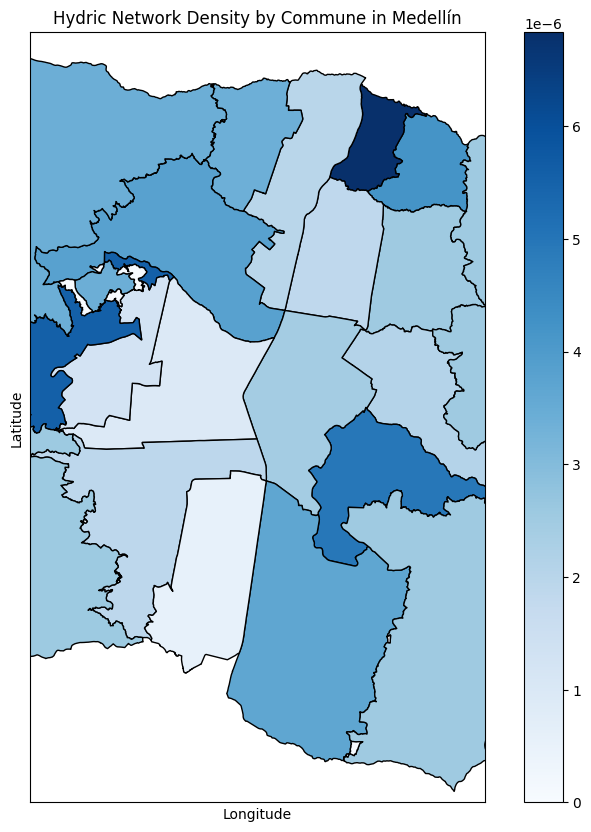

In [13]:
redHidricaPorComuna.plot(column='hidric_density', legend=True, figsize=(10, 10), cmap='Blues', edgecolor='black')
plt.title('Hydric Network Density by Commune in Medellín')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.xticks([])
plt.yticks([])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [21]:
# Create a new DataFrame with the calculated densities
indiceGlobal = pd.DataFrame({
	'tree_density': arbolPorComuna['tree_density']*1e5,
	'ecoparques_density': ecoparquesPorComuna['ecoparques_density']*1e4,
	'green_zones_density': invZonasVerdesPorComuna['green_zones_density']*1e5,
	'densidad_corredor': corredorVerdePorComuna['densidad_corredor']*1e5,
	'atra_density': atraTuristicoPorComuna['atra_density']*1e4,
    'hidry_density': redHidricaPorComuna['hidric_density']*1e7
})

# Sum the densities to create a global index
indiceGlobal['global_index'] = indiceGlobal.sum(axis=1)

# Add the geometry and 'nombre' from the comunas GeoDataFrame
indiceGlobal = gpd.GeoDataFrame(indiceGlobal, geometry=comunas['geometry'])
indiceGlobal['nombre'] = comunas['nombre'].values


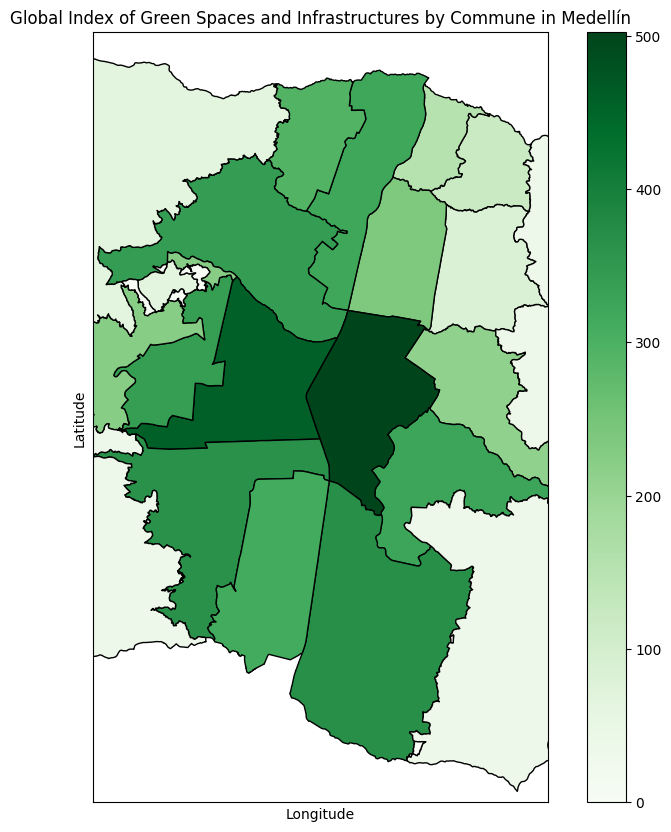

In [22]:
# Display the result
indiceGlobal.plot(column='global_index', legend=True, figsize=(10, 10), cmap='Greens', edgecolor='black')
plt.title('Global Index of Green Spaces and Infrastructures by Commune in Medellín')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.xticks([])
plt.yticks([])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [23]:
indiceGlobal

,tree_density,ecoparques_density,green_zones_density,densidad_corredor,atra_density,hidry_density,global_index,geometry,nombre
0,77.729051,0.003228,0.000000,0.032280,0.003228,41.963358,119.731144,"POLYGON ((4718193.072 2255308.014, 4718182.769...",Popular
1,85.167911,0.040990,0.000000,0.045544,0.000000,68.316506,153.570952,"POLYGON ((4717199.364 2255945.395, 4717195.762...",Santa Cruz
2,59.161936,0.003925,0.000000,0.019623,0.001962,25.509292,84.696737,"POLYGON ((4718792.583 2253310.702, 4718790.16 ...",Manrique
3,164.990410,0.008191,52.730583,0.081912,0.018430,18.430107,236.259632,"POLYGON ((4716607.297 2253867.449, 4716607.168...",Aranjuez
4,283.925455,0.004947,16.392049,0.016491,0.000000,19.789194,320.128135,"POLYGON ((4716246.187 2256230.621, 4716238.195...",Castilla
5,259.545142,0.002598,0.000000,0.000000,0.000000,33.767883,293.315622,"POLYGON ((4715116.584 2256050.193, 4715114.635...",Doce de Octubre
6,287.106084,0.006341,15.800029,0.073980,0.002114,38.046893,341.035441,"POLYGON ((4713487.934 2254398.619, 4713487.771...",Robledo
7,191.849950,0.005248,0.000000,0.034984,0.000000,20.990148,212.880328,"POLYGON ((4717867.132 2250665.308, 4717865.134...",Villa Hermosa
8,267.501858,0.004956,7.566911,0.016522,0.001652,49.564917,324.656816,"POLYGON ((4717386.83 2248752.267, 4717385.652 ...",Buenos Aires
9,354.947295,0.001359,122.459330,0.190196,0.058417,24.453827,502.110425,"POLYGON ((4716374.474 2250846.788, 4716331.146...",La Candelaria


In [24]:
indiceGlobal.drop(axis = 0, index = [15,16,17,18,19,20,21], inplace = True)

In [25]:
indiceGlobal

,tree_density,ecoparques_density,green_zones_density,densidad_corredor,atra_density,hidry_density,global_index,geometry,nombre
0,77.729051,0.003228,0.000000,0.032280,0.003228,41.963358,119.731144,"POLYGON ((4718193.072 2255308.014, 4718182.769...",Popular
1,85.167911,0.040990,0.000000,0.045544,0.000000,68.316506,153.570952,"POLYGON ((4717199.364 2255945.395, 4717195.762...",Santa Cruz
2,59.161936,0.003925,0.000000,0.019623,0.001962,25.509292,84.696737,"POLYGON ((4718792.583 2253310.702, 4718790.16 ...",Manrique
3,164.990410,0.008191,52.730583,0.081912,0.018430,18.430107,236.259632,"POLYGON ((4716607.297 2253867.449, 4716607.168...",Aranjuez
4,283.925455,0.004947,16.392049,0.016491,0.000000,19.789194,320.128135,"POLYGON ((4716246.187 2256230.621, 4716238.195...",Castilla
5,259.545142,0.002598,0.000000,0.000000,0.000000,33.767883,293.315622,"POLYGON ((4715116.584 2256050.193, 4715114.635...",Doce de Octubre
6,287.106084,0.006341,15.800029,0.073980,0.002114,38.046893,341.035441,"POLYGON ((4713487.934 2254398.619, 4713487.771...",Robledo
7,191.849950,0.005248,0.000000,0.034984,0.000000,20.990148,212.880328,"POLYGON ((4717867.132 2250665.308, 4717865.134...",Villa Hermosa
8,267.501858,0.004956,7.566911,0.016522,0.001652,49.564917,324.656816,"POLYGON ((4717386.83 2248752.267, 4717385.652 ...",Buenos Aires
9,354.947295,0.001359,122.459330,0.190196,0.058417,24.453827,502.110425,"POLYGON ((4716374.474 2250846.788, 4716331.146...",La Candelaria


<Axes: >

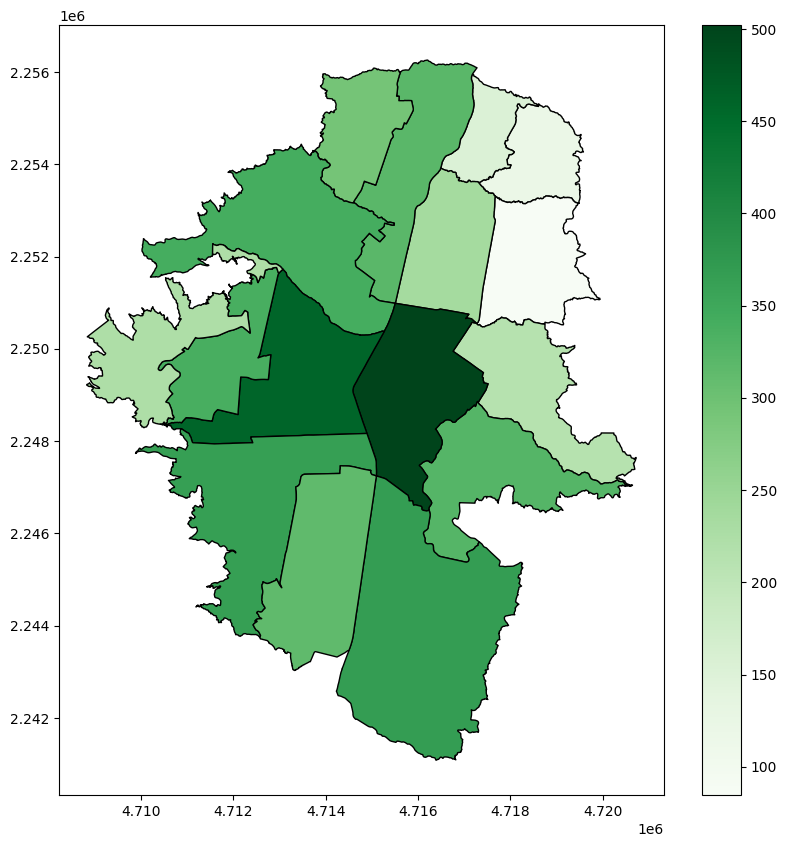

In [26]:
indiceGlobal.plot(column='global_index', legend=True, figsize=(10, 10), cmap='Greens', edgecolor='black')

In [28]:
# exportamos los datos del gdf global a geojson
indiceGlobal.to_file('indice_global.geojson', driver='GeoJSON')